# ***Customer Transaction Analysis***


## Project Overview, Business Context & Workflow

### Project Overview

This project explores customer transaction behavior to uncover spending trends, refund patterns, and regional or payment-based variations. The analysis aims to generate actionable insights that can support fraud risk detection, churn prediction, and customer segmentation initiatives.

The dataset contains synthetic transaction-level data, including transaction and refund amounts, payment methods, transaction timestamps, and customer identifiers.
While there is no fraud flag or modeling in this project, the focus is on exploratory analysis, visualization, and behavioral insights.

---

### Business Context

Customer transaction analysis is a critical upstream step in e-commerce analytics.
By understanding how customers spend, request refunds, and interact with payment systems, organizations can detect emerging behavioral patterns that may signal risk, inefficiency, or opportunity.

This analysis replicates the exploratory analytical workflow of a data analyst operating in a customer risk or retention domain — focusing on insight generation before predictive modeling.

---

### Project Objectives

- Explore customer transaction and refund behavior patterns.

- Identify relationships between payment methods, regions, and spending patterns.

- Visualize distributions and trends in financial attributes.

- Summarize insights that can inform downstream risk, churn, or fraud models.

---

### Data Source & Structure

- Synthetic dataset containing transaction-level information.

Key columns:

- transaction_id, customer_id, transaction_amount, refund_amount, region, payment_method, transaction_date

- No confidential or proprietary data used.

- Data is representative of real-world transaction behavior.

---

### Business Impact

This analysis supports:

- Operational teams by identifying refund-heavy customer groups or payment channels.

- Data teams by revealing variables that could be meaningful in churn or fraud detection.

- Business leadership by providing evidence-backed insights into customer transaction health.

---

### Simplified Workflow

- Import and explore transaction data
- Clean and preprocess key attributes
- Analyze spending, refund, and regional patterns
-  Visualize behavioral and financial distributions
-  Derive insights and recommendations for future analytical use

##  Data Collection & Initial Exploration

This section establishes the analytical foundation — importing essential libraries, loading the dataset, and performing initial structural checks.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:

base_path = '/content/drive/MyDrive/Portfolio Projects/Customer Transaction Analysis/customer_transaction_analysis_data.csv'

df = pd.read_csv(base_path)

In [75]:
df.head()

,transaction_id,customer_id,account_id,transaction_date,posting_date,transaction_amount,currency,merchant_id,merchant_name,merchant_category,...,location_state,location_country,balance_before,balance_after,is_fraud,customer_since,customer_age,customer_gender,credit_score,reward_points_earned
0,cfbfff6e-548d-45ab-bd47-c3af21b10774,ae101def-6378-4a57-af2f-13831eb933c6,fced023a-c73b-4051-95ce-0044fee7d58b,2023-06-28T12:23:31.876Z,2022-03-11T10:53:37.841Z,4668.11,BMD,584b02d9-4e0c-4869-8038-7d9395199f66,Feeney and Sons,Home,...,Vermont,China,9162.743324,4690.141442,False,2025-06-30T23:06:38.073Z,57,Androgynous,665,145
1,db45f012-a0ee-4a80-a859-491371311b28,486c1800-f83b-4d99-bd8a-6e9747f2fe54,270f0001-fd5f-4fbf-86b1-39844c4d0ecf,2023-03-17T11:22:25.256Z,2023-12-07T18:52:16.361Z,1042.72,VES,84beb445-2c1d-45b3-b2c2-8ff354e17686,Collier - Waters,Toys,...,Alabama,Iran,6748.357564,1941.717340,False,2024-09-03T10:16:15.469Z,23,Transsexual male,735,508
2,2fd4ea51-1374-4341-8890-1a6ecde181c0,3a7f6cca-57bc-4819-bfbe-398e8c133e1a,f6e89d11-a4e6-4677-b8b3-2dd16f5e2ac8,2022-10-15T07:40:35.636Z,2022-11-21T00:18:54.946Z,3428.38,DKK,c02b7600-f2c1-42e7-a935-dd9ce3eea4be,Rogahn - Cartwright,Computers,...,Washington,Senegal,3647.329290,5657.085090,False,2016-02-20T22:08:29.505Z,72,Male to female transgender woman,454,526
3,59a0d00e-c94b-42ff-9021-243b6642afed,81994b75-665c-4176-bd94-be1d93bc1c35,addbbbc0-7c69-4c71-8114-da2cb5b6481b,2022-09-26T06:56:41.344Z,2022-04-07T20:25:06.790Z,1539.85,AFN,3cf64c65-289c-45aa-a4f6-3743fcaa95b1,Goodwin - Homenick,Garden,...,Nebraska,Macao,1435.559207,8541.294285,False,2018-01-31T00:21:14.114Z,53,Agender,694,748
4,b1cd7143-605a-4081-8c14-96d0f6ff531c,ede611a7-9fa8-407f-adf5-911eb37987ac,f8e3a1c2-4dad-477e-9bd3-46c31e4886be,2022-08-08T12:32:45.386Z,2023-04-20T16:57:42.981Z,3146.31,UGX,182755d6-2e60-48c7-8dd4-7425609a6ff3,McClure Inc,Health,...,Georgia,Zimbabwe,4144.677691,8752.950082,False,2018-08-22T01:13:40.050Z,62,Cis man,345,812


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transaction_id        100000 non-null  object 
 1   customer_id           100000 non-null  object 
 2   account_id            100000 non-null  object 
 3   transaction_date      100000 non-null  object 
 4   posting_date          100000 non-null  object 
 5   transaction_amount    100000 non-null  float64
 6   currency              100000 non-null  object 
 7   merchant_id           100000 non-null  object 
 8   merchant_name         100000 non-null  object 
 9   merchant_category     100000 non-null  object 
 10  card_issuer           100000 non-null  object 
 11  location_city         100000 non-null  object 
 12  location_state        100000 non-null  object 
 13  location_country      100000 non-null  object 
 14  balance_before        100000 non-null  float64
 15  b

In [77]:
df.describe()

,transaction_amount,balance_before,balance_after,customer_age,credit_score,reward_points_earned
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2501.564621,4993.676770,5002.854970,53.988040,575.111100,499.911730
std,1440.219520,2885.462797,2890.671356,21.097023,158.940908,289.278742
min,1.060000,0.030796,0.023540,18.000000,300.000000,0.000000
25%,1258.605000,2501.105974,2495.275437,36.000000,438.000000,249.000000
50%,2496.630000,4983.878317,5016.849268,54.000000,575.000000,500.000000
75%,3747.545000,7482.642710,7505.344490,72.000000,712.000000,751.000000
max,4999.980000,9999.857175,9999.989379,90.000000,850.000000,1000.000000


## Data Cleaning & Preprocessing

The dataset was cleaned and standardized to ensure reliability for downstream analysis.
Key preprocessing steps included handling missing and duplicate records, correcting data types, standardizing categorical fields, and deriving contextual features like customer tenure and transaction month.


 ### Checking For Null Values

In [78]:
df.isnull().sum()

,0
transaction_id,0
customer_id,0
account_id,0
transaction_date,0
posting_date,0
transaction_amount,0
currency,0
merchant_id,0
merchant_name,0
merchant_category,0


### Checking For Duplicate Values


In [79]:
df.duplicated().sum()

np.int64(0)

### Converting date columns to datetime datatype

In [80]:
df['transaction_date']=pd.to_datetime(df['transaction_date'])

df['posting_date']=pd.to_datetime(df['posting_date'])

df['customer_since']=pd.to_datetime(df['customer_since'])

Date Time Format Explanation

In [81]:
df[['transaction_date','posting_date','customer_since']].head(1)

# 2023-06-28 — Date
# 12:23:31 — Time (hours, minutes, seconds)
# .876000 — Microseconds = 0.876 seconds


# +00:00 — UTC offset
# Means this timestamp is in UTC time

# A timestamp like +05:30 would mean 5.5 hours ahead of UTC

,transaction_date,posting_date,customer_since
0,2023-06-28 12:23:31.876000+00:00,2022-03-11 10:53:37.841000+00:00,2025-06-30 23:06:38.073000+00:00


In [82]:
# Extracting the UTC offset to check if timestamps are normalized or in different time zones

print(df['transaction_date'].apply(lambda x: x.utcoffset()).unique())

print(df['posting_date'].apply(lambda x: x.utcoffset()).unique())

print(df['customer_since'].apply(lambda x: x.utcoffset()).unique())


#  Converting all timestamps to UTC implies, the time has been normalized to UTC , standardizing times to a single global reference frame.

# A result of '0 days' indicates all timestamps are timezone-aware and normalized to UTC

# This does not mean they were originally in the same timezone, only that they've been converted to UTC



<TimedeltaArray>
['0 days']
Length: 1, dtype: timedelta64[ns]
<TimedeltaArray>
['0 days']
Length: 1, dtype: timedelta64[ns]
<TimedeltaArray>
['0 days']
Length: 1, dtype: timedelta64[ns]


In [83]:
df[['transaction_date','posting_date','customer_since']].head(1)

,transaction_date,posting_date,customer_since
0,2023-06-28 12:23:31.876000+00:00,2022-03-11 10:53:37.841000+00:00,2025-06-30 23:06:38.073000+00:00


### Creating New Columns

Month Column

In [84]:
# Adding a Month Column

df['transaction_month']=df['transaction_date'].dt.to_period('M')

# but since the data spans two years, differeniateing between the months would be difficult and also for plotting , hence converting to datetime dtype

df['transaction_month']=df['transaction_month'].dt.to_timestamp()

/tmp/ipython-input-4161242153.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['transaction_month']=df['transaction_date'].dt.to_period('M')


Tenure Column

In [85]:
pd.Timestamp.now()

Timestamp('2025-10-24 13:19:30.208324')

In [86]:
# (pd.Timestamp.now(tz='UTC')-df['customer_since']).dt.days.head()

In [87]:
df['tenure_years']=round((pd.Timestamp.now(tz='UTC')-df['customer_since']).dt.days/365,3)

In [88]:
df.head(3)

,transaction_id,customer_id,account_id,transaction_date,posting_date,transaction_amount,currency,merchant_id,merchant_name,merchant_category,...,balance_before,balance_after,is_fraud,customer_since,customer_age,customer_gender,credit_score,reward_points_earned,transaction_month,tenure_years
0,cfbfff6e-548d-45ab-bd47-c3af21b10774,ae101def-6378-4a57-af2f-13831eb933c6,fced023a-c73b-4051-95ce-0044fee7d58b,2023-06-28 12:23:31.876000+00:00,2022-03-11 10:53:37.841000+00:00,4668.11,BMD,584b02d9-4e0c-4869-8038-7d9395199f66,Feeney and Sons,Home,...,9162.743324,4690.141442,False,2025-06-30 23:06:38.073000+00:00,57,Androgynous,665,145,2023-06-01,0.315
1,db45f012-a0ee-4a80-a859-491371311b28,486c1800-f83b-4d99-bd8a-6e9747f2fe54,270f0001-fd5f-4fbf-86b1-39844c4d0ecf,2023-03-17 11:22:25.256000+00:00,2023-12-07 18:52:16.361000+00:00,1042.72,VES,84beb445-2c1d-45b3-b2c2-8ff354e17686,Collier - Waters,Toys,...,6748.357564,1941.717340,False,2024-09-03 10:16:15.469000+00:00,23,Transsexual male,735,508,2023-03-01,1.140
2,2fd4ea51-1374-4341-8890-1a6ecde181c0,3a7f6cca-57bc-4819-bfbe-398e8c133e1a,f6e89d11-a4e6-4677-b8b3-2dd16f5e2ac8,2022-10-15 07:40:35.636000+00:00,2022-11-21 00:18:54.946000+00:00,3428.38,DKK,c02b7600-f2c1-42e7-a935-dd9ce3eea4be,Rogahn - Cartwright,Computers,...,3647.329290,5657.085090,False,2016-02-20 22:08:29.505000+00:00,72,Male to female transgender woman,454,526,2022-10-01,9.679


### Standardizing the Transaction amount and Balance Columns to USD

In [89]:
# since we have curreny values , getting the exchange rate in terms of USD

import requests

# Fetch latest exchange rates with USD as base
response = requests.get("https://open.er-api.com/v6/latest/USD")
data = response.json()

# Get the mapping: currency_code → rate_to_usd
rates = data["rates"]  # e.g., {'EUR': 0.91, 'INR': 83.2, 'JPY': 140.4, ...}


In [90]:
rates.keys()

dict_keys(['USD', 'AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG', 'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BIF', 'BMD', 'BND', 'BOB', 'BRL', 'BSD', 'BTN', 'BWP', 'BYN', 'BZD', 'CAD', 'CDF', 'CHF', 'CLF', 'CLP', 'CNH', 'CNY', 'COP', 'CRC', 'CUP', 'CVE', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'ERN', 'ETB', 'EUR', 'FJD', 'FKP', 'FOK', 'GBP', 'GEL', 'GGP', 'GHS', 'GIP', 'GMD', 'GNF', 'GTQ', 'GYD', 'HKD', 'HNL', 'HRK', 'HTG', 'HUF', 'IDR', 'ILS', 'IMP', 'INR', 'IQD', 'IRR', 'ISK', 'JEP', 'JMD', 'JOD', 'JPY', 'KES', 'KGS', 'KHR', 'KID', 'KMF', 'KRW', 'KWD', 'KYD', 'KZT', 'LAK', 'LBP', 'LKR', 'LRD', 'LSL', 'LYD', 'MAD', 'MDL', 'MGA', 'MKD', 'MMK', 'MNT', 'MOP', 'MRU', 'MUR', 'MVR', 'MWK', 'MXN', 'MYR', 'MZN', 'NAD', 'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK', 'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RON', 'RSD', 'RUB', 'RWF', 'SAR', 'SBD', 'SCR', 'SDG', 'SEK', 'SGD', 'SHP', 'SLE', 'SLL', 'SOS', 'SRD', 'SSP', 'STN', 'SYP', 'SZL', 'THB', 'TJS', 'TMT', 'TND', 'T

In [91]:
# total number of unique currency denominations

df['currency'].nunique()

154

In [92]:
# total number unique currency denominations obtained from the API

len(rates.keys())

165

In [93]:
# checking to see if there are any missing currency denominations

df[~df['currency'].isin(rates.keys())]['currency'].unique()

# 'KPW':  North korean curreny has been excluded from the list obtained from the API

array(['KPW'], dtype=object)

In [94]:
# checking to see

df[df['currency']=='KPW'].head(3)

,transaction_id,customer_id,account_id,transaction_date,posting_date,transaction_amount,currency,merchant_id,merchant_name,merchant_category,...,balance_before,balance_after,is_fraud,customer_since,customer_age,customer_gender,credit_score,reward_points_earned,transaction_month,tenure_years
12,e7f761fb-1499-422a-83e2-f42452f7fa8b,3da97544-0f11-49d2-bdb6-96aa644b3c09,cded9723-793d-4791-8b90-b124f404d163,2022-08-16 11:09:56.283000+00:00,2022-12-18 16:23:15.841000+00:00,157.77,KPW,31354f19-643b-46e7-b2e0-e2cbcdd94594,McCullough - Lynch,Electronics,...,8538.981420,2248.523416,False,2016-01-16 22:46:39.152000+00:00,73,Male to female,796,678,2022-08-01,9.775
358,8ba460e9-ef91-44fd-a499-5b8438ca8beb,6bdad56b-91e8-4ad4-ae09-964eead99637,9936f24f-895c-40ba-bd3a-74a99a36db28,2023-11-13 09:03:21.079000+00:00,2022-04-11 18:33:20.524000+00:00,3382.31,KPW,08c89b7a-712d-485e-a124-298de65e919f,"Larkin, Thompson and Dooley",Books,...,1092.465200,4002.485331,False,2017-04-04 07:03:29.251000+00:00,24,T* man,613,200,2023-11-01,8.562
359,a3a8f502-28dc-4f94-9bab-b9c5d4a9373e,58438c28-7ab6-4e56-8ef1-bbe9d265400c,d8622c58-1bcd-462b-a921-2a7bf8ad249f,2022-12-10 05:16:35.278000+00:00,2022-02-12 05:33:45.077000+00:00,3176.54,KPW,0e8e47f6-2c2a-447c-b0fe-1f0e838f1b82,O'Reilly - Greenholt,Grocery,...,7043.449565,4255.347090,False,2022-08-28 19:30:02.126000+00:00,18,Androgynous,777,371,2022-12-01,3.156


In [95]:
# North korean curreny has been excluded from the list obtained from the API, so adding the values manually based on todays value

rates['KPW'] = 900.0094

In [96]:
# checking to see if its included

df[~df['currency'].isin(rates.keys())]['currency'].unique()

array([], dtype=object)

In [97]:

# added as the last entry
rates.keys()

dict_keys(['USD', 'AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG', 'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BIF', 'BMD', 'BND', 'BOB', 'BRL', 'BSD', 'BTN', 'BWP', 'BYN', 'BZD', 'CAD', 'CDF', 'CHF', 'CLF', 'CLP', 'CNH', 'CNY', 'COP', 'CRC', 'CUP', 'CVE', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'ERN', 'ETB', 'EUR', 'FJD', 'FKP', 'FOK', 'GBP', 'GEL', 'GGP', 'GHS', 'GIP', 'GMD', 'GNF', 'GTQ', 'GYD', 'HKD', 'HNL', 'HRK', 'HTG', 'HUF', 'IDR', 'ILS', 'IMP', 'INR', 'IQD', 'IRR', 'ISK', 'JEP', 'JMD', 'JOD', 'JPY', 'KES', 'KGS', 'KHR', 'KID', 'KMF', 'KRW', 'KWD', 'KYD', 'KZT', 'LAK', 'LBP', 'LKR', 'LRD', 'LSL', 'LYD', 'MAD', 'MDL', 'MGA', 'MKD', 'MMK', 'MNT', 'MOP', 'MRU', 'MUR', 'MVR', 'MWK', 'MXN', 'MYR', 'MZN', 'NAD', 'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK', 'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RON', 'RSD', 'RUB', 'RWF', 'SAR', 'SBD', 'SCR', 'SDG', 'SEK', 'SGD', 'SHP', 'SLE', 'SLL', 'SOS', 'SRD', 'SSP', 'STN', 'SYP', 'SZL', 'THB', 'TJS', 'TMT', 'TND', 'T

In [98]:
# respective values of the currencies, wrt US dollar
rates.values()

dict_values([1, 3.6725, 66.304272, 83.321619, 382.382711, 1.79, 923.273397, 1484, 1.535982, 1.79, 1.69989, 1.68479, 2, 122.409615, 1.685037, 0.376, 2944.369107, 1, 1.298872, 6.916525, 5.38499, 1, 87.857337, 13.914784, 3.264552, 2, 1.398709, 2226.866303, 0.795965, 0.024058, 950.920333, 7.124951, 7.116291, 3907.712205, 502.004574, 24, 94.984389, 20.955982, 177.721, 6.427753, 63.64621, 130.405242, 47.590897, 15, 149.012154, 0.86142, 2.298104, 0.750156, 6.427713, 0.750156, 2.715058, 0.750156, 10.970758, 0.750156, 73.450273, 8696.057897, 7.656918, 209.061198, 7.771333, 26.238765, 6.490363, 130.825825, 335.99676, 16630.657721, 3.294833, 0.750156, 87.857391, 1310.202683, 42377.798572, 122.520305, 0.750156, 160.508504, 0.709, 152.476536, 129.184485, 87.37333, 4023.698584, 1.53598, 423.790469, 1437.599025, 0.306417, 0.833333, 538.066328, 21753.085117, 89500, 303.092873, 182.863716, 17.333178, 5.434462, 9.242257, 17.023464, 4503.165808, 53.081847, 2101.255883, 3592.452219, 8.004473, 40.162642, 4

In [99]:
rates['INR']

## the values of 1 dollar US is equal to 87.424333 INR

87.857391

In [100]:
# Normalizing all the values to USD
rate_to_usd = { currency :1/rate for currency, rate in rates.items()}


print(rate_to_usd['INR'])
# 1 / 87.75386 = 0.011395510123429329


# mapping the values in the data to values in the dictionary
df['rate_to_usd']=df["currency"].map(rate_to_usd)


# converting all the values to USD
df['transaction_amount_usd']=df['transaction_amount']*df['rate_to_usd']

0.011382081673697775


In [101]:
# creating new columns in terms of USD

df['balance_before_usd']=df['balance_before']*df['rate_to_usd']

df['balance_after_usd']=df['balance_after']*df['rate_to_usd']

df['balance_diff_usd']=df['balance_after_usd']-df['balance_before_usd']

In [102]:
# checking to see the changes

df[df['currency']=="INR"][['transaction_amount','rate_to_usd','transaction_amount_usd','balance_before_usd','balance_after_usd','balance_diff_usd']].sample(5)

,transaction_amount,rate_to_usd,transaction_amount_usd,balance_before_usd,balance_after_usd,balance_diff_usd
58814,3446.97,0.011382,39.233694,88.081896,40.663834,-47.418061
78431,4381.38,0.011382,49.869225,29.609224,76.042733,46.433509
24366,3144.39,0.011382,35.789704,93.997864,82.313822,-11.684042
23328,4717.33,0.011382,53.693035,20.270276,53.937158,33.666882
47753,47.36,0.011382,0.539055,10.402229,93.981108,83.578879


### Cleaning the gender Column

In [103]:
df['customer_gender'].unique()

array(['Androgynous', 'Transsexual male',
       'Male to female transgender woman', 'Agender', 'Cis man',
       'Cisgender man', 'Male to female transsexual woman', 'Demi-boy',
       'Female to male trans man', 'Intersex man', 'Cis male',
       'Male to female', 'T* woman', 'Pangender', 'Demigender',
       'Demi-man', 'Intersex', 'Two* person', 'Neutrois',
       'Transsexual female', 'Male to female trans woman',
       'Gender questioning', 'Gender variant', 'Demi-girl',
       'Gender fluid', 'Cisgender male', 'Woman', 'Polygender',
       'Androgyne', 'Omnigender', 'Genderflux',
       'Female to male transsexual man', 'Trans male',
       'Gender nonconforming', 'Transgender female', 'Multigender',
       'Transmasculine', 'Gender neutral', 'Transsexual person',
       'Cis female', 'Intersex person', 'Two-spirit person',
       'Transgender person', 'Female to male transgender man',
       'Trans female', 'Two-spirit', 'Cisgender', 'Bigender',
       'Non-binary', 'MTF', 'Tr

In [104]:
gender_map = {
        'male': ['cis man', 'cisgender man', 'cis male', 'cisgender male', 'man'],

        'female': ['cis woman', 'cisgender woman', 'cis female', 'cisgender female', 'woman'],

        'trans_male': ['trans man', 'ftm', 'f2m', 'female to male', 'female to male transgender man',
            'female to male trans man', 'female to male transsexual man','transgender male', 'trans male','Transsexual male','Transmasculine'],

        'trans_female': ['trans woman', 'mtf', 'm2f', 'male to female', 'male to female transgender woman',
            'male to female trans woman', 'male to female transsexual woman','trans female', 'transgender female','Transsexual female'],

        'non_binary': ['non-binary', 'agender', 'genderqueer', 'gender fluid', 'gender neutral',
            'gender nonconforming', 'gender variant', 'neutrois', 'androgyne','demiboy', 'demi-boy', 'demigender',
            'demigirl', 'demi-girl', 'demiman', 'demi-man', 'demiwoman', 'demi-woman','two-spirit', 'two-spirit person',
            'bigender', 'trigender', 'polygender','omnigender', 'multigender', 'genderflux', 'xenogender', 'pangender',
            'gender questioning', 'androgynous', 't* man', 't* woman','demiflux', 'two* person'],

        'intersex': ['intersex', 'intersex person', 'intersex man', 'intersex woman', 'hermaphrodite'],

        'other': ['other', 'transsexual', 'transsexual man', 'transsexual woman','transsexual person', 'transgender person',
                  'trans', 'cisgender', 'cis', 'neither','Trans person']
    }

In [105]:
    # Flatten the mapping to a lowercase lookup dict #

flat_map = {}

for bucket, values in gender_map.items():
  for v in values:
        flat_map[v.strip().lower()] = bucket

In [106]:
# gender_map : nested dictionary , with genders categorized into individual keys


# flat_map : values of the  gender_map become the keys in flat_map


In [107]:
flat_map.keys()

dict_keys(['cis man', 'cisgender man', 'cis male', 'cisgender male', 'man', 'cis woman', 'cisgender woman', 'cis female', 'cisgender female', 'woman', 'trans man', 'ftm', 'f2m', 'female to male', 'female to male transgender man', 'female to male trans man', 'female to male transsexual man', 'transgender male', 'trans male', 'transsexual male', 'transmasculine', 'trans woman', 'mtf', 'm2f', 'male to female', 'male to female transgender woman', 'male to female trans woman', 'male to female transsexual woman', 'trans female', 'transgender female', 'transsexual female', 'non-binary', 'agender', 'genderqueer', 'gender fluid', 'gender neutral', 'gender nonconforming', 'gender variant', 'neutrois', 'androgyne', 'demiboy', 'demi-boy', 'demigender', 'demigirl', 'demi-girl', 'demiman', 'demi-man', 'demiwoman', 'demi-woman', 'two-spirit', 'two-spirit person', 'bigender', 'trigender', 'polygender', 'omnigender', 'multigender', 'genderflux', 'xenogender', 'pangender', 'gender questioning', 'androgy

In [108]:
df['customer_gender'].nunique()

76

In [109]:
len(flat_map.keys())

81

In [110]:
# debugging , to see if all the values were mapped,

# since there wer null values , figured some values were not mapped

df[df['customer_gender'].str.lower().str.strip().map(flat_map).isnull()]['customer_gender'].unique()


array([], dtype=object)

In [111]:
# the below values were missed hence included in the gender_map

# array(['Transsexual male', 'Two* person', 'Transsexual female',
#        'Transmasculine', 'Demiflux', 'Trans person'], dtype=object)

In [112]:
# Mapping the values and based on the category and adding new column

df['gender_mapped']=df['customer_gender'].str.lower().str.strip().map(flat_map)

In [113]:
# checking to see if the values have been mapped

df[['customer_gender','gender_mapped']].head(5)

,customer_gender,gender_mapped
0,Androgynous,non_binary
1,Transsexual male,trans_male
2,Male to female transgender woman,trans_female
3,Agender,non_binary
4,Cis man,male


In [114]:
# since there were more genders included in the map (81) as opposed to the gender columns(76) , checking to see what extra was included

gender_values = list(df['customer_gender'].str.lower().str.strip().unique())

flat_map_keys = list(flat_map.keys())

extra_in_map = [key for key in flat_map_keys if key not in gender_values]

extra_in_map

['transgender male', 'demiboy', 'demigirl', 'demiman', 'demiwoman']

### Checking other Categorical Columns if they can be Grouped

In [115]:
df['merchant_category'].value_counts()

,count
merchant_category,
Jewelry,4670
Home,4644
Electronics,4640
Baby,4611
Automotive,4607
Computers,4594
Games,4586
Tools,4583
Outdoors,4576


In [116]:
df['card_issuer'].value_counts()

,count
card_issuer,
discover,16795
visa,16746
mastercard,16665
jcb,16645
american_express,16613
diners_club,16536


In [117]:
# apart from gender other columns do not need redefining

# all the id columns stay as is

# merchant_category and card_issuer  stay as is since the split among them is equally balanced and many


### Checking the Outliers in Numerical Columns

In [118]:
df['transaction_amount_usd'].describe()

,transaction_amount_usd
count,100000.000000
mean,643.081426
std,1519.740262
min,0.000012
25%,5.605671
50%,57.155062
75%,508.965525
max,16303.011909


In [119]:
                                                                # Function to check number of Outlliers #



def plot_outliers_and_distribution_for_column(column_data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

    # Print the number of outliers
    print(f"lower bound : {lower_bound}")
    print(f"upper bound : {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")

    # Create a figure with 2 subplots: one for the boxplot and one for the distribution plot
    plt.figure(figsize=(12, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=column_data)
    plt.title('Boxplot of the Feature')

    # Distribution plot (KDE plot)
    plt.subplot(1, 2, 2)
    sns.kdeplot(column_data, fill=True)
    plt.title('Distribution Plot (KDE)')

    # Show both plots
    plt.tight_layout()
    plt.show()

lower bound : -749.4341105432021
upper bound : 1264.0053064653946
Number of outliers: 14420


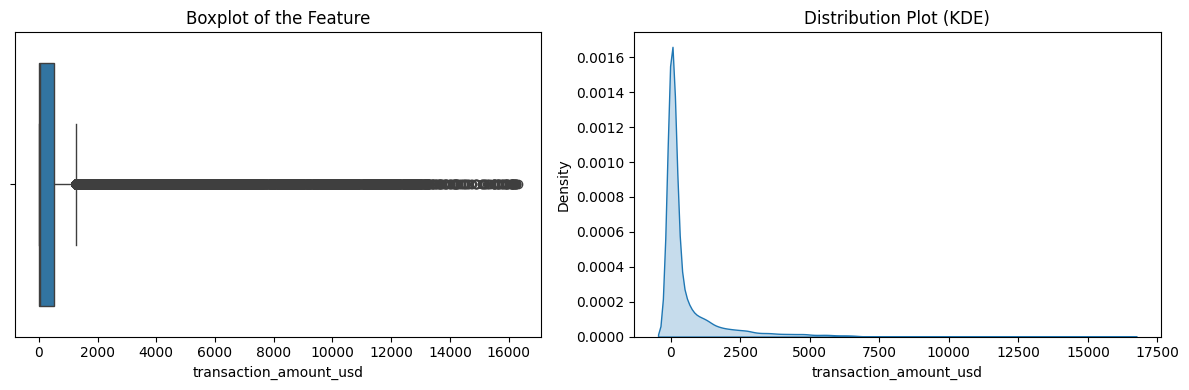

In [120]:
plot_outliers_and_distribution_for_column(df['transaction_amount_usd'])

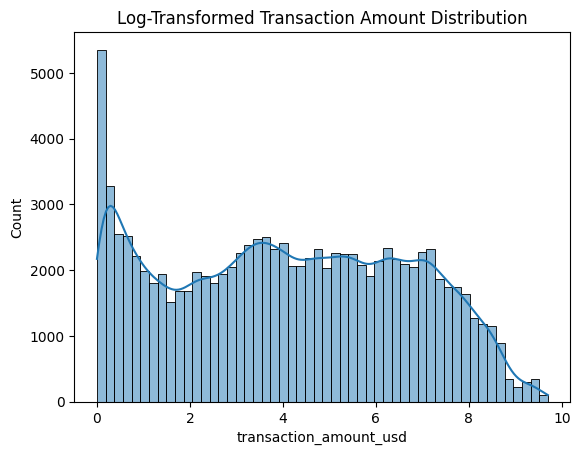

In [121]:
# Log transformed plot of Transaction Amount for better visualization

sns.histplot(np.log1p(df['transaction_amount_usd']), kde=True)
plt.title('Log-Transformed Transaction Amount Distribution')
plt.show()

lower bound : -18.0
upper bound : 126.0
Number of outliers: 0


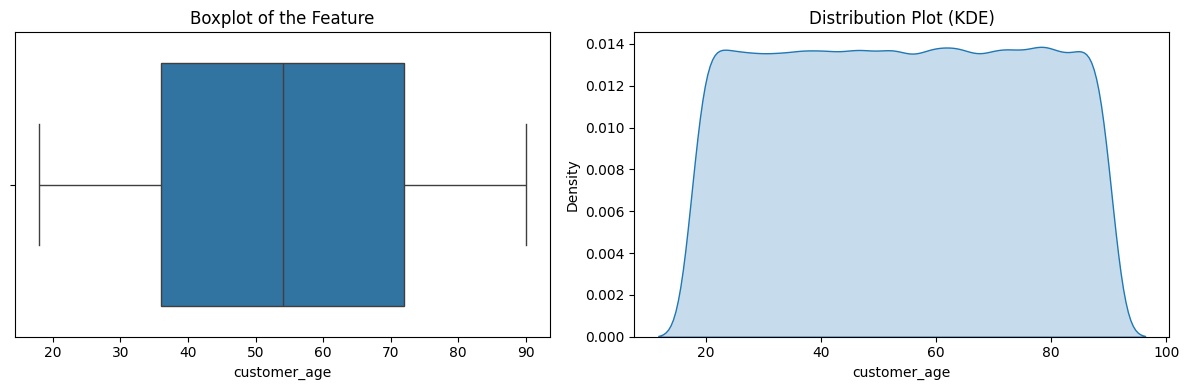

In [122]:
plot_outliers_and_distribution_for_column(df['customer_age'])

lower bound : 27.0
upper bound : 1123.0
Number of outliers: 0


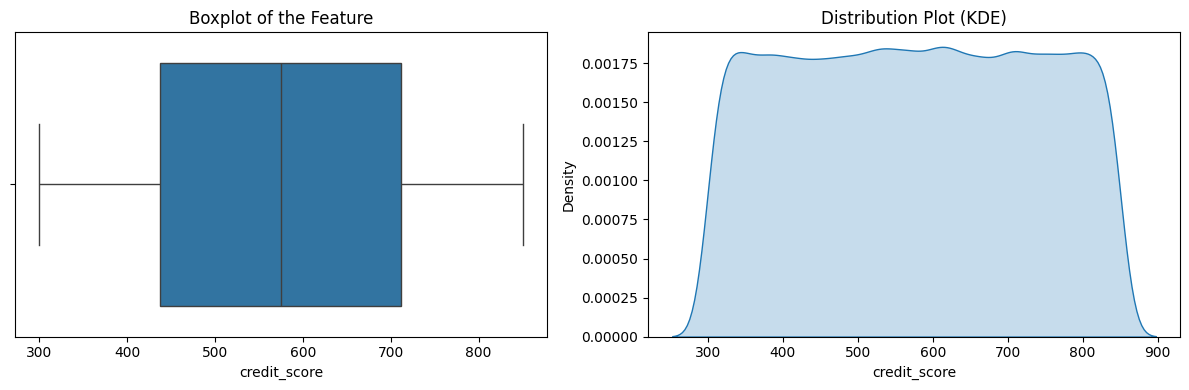

In [123]:
plot_outliers_and_distribution_for_column(df['credit_score'])

Outliers in transaction_amount_usd were retained intentionally. In financial datasets, extreme transaction values often indicate meaningful customer or operational behavior rather than anomalies.

Related balance metrics (balance_before_usd, balance_after_usd, and balance_diff_usd) were therefore also left unmodified, as they are derived from these transactions and show consistent numerical logic.

For demographic and credit-related attributes (customer_age and credit_score), no outliers were identified, confirming data consistency across these dimensions.

## Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) phase establishes a foundational understanding of transaction patterns and customer activity.
This section focuses on identifying key spending behaviors, transaction dynamicswithin the dataset.

#### Creating a Clean Working Copy

In [124]:
# Copying the data and keeping only required columns for Analysis

df1=df.copy()

In [125]:
df1=df1[['transaction_id', 'customer_id', 'account_id', 'transaction_date','transaction_month',
   'posting_date',  'merchant_id','merchant_name', 'merchant_category','gender_mapped',
  'location_country','location_state','location_city' ,'customer_since', 'customer_age','tenure_years',
   'card_issuer','balance_before_usd', 'balance_after_usd', 'balance_diff_usd','is_fraud',
    'credit_score', 'reward_points_earned','transaction_amount_usd']]

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   transaction_id          100000 non-null  object             
 1   customer_id             100000 non-null  object             
 2   account_id              100000 non-null  object             
 3   transaction_date        100000 non-null  datetime64[ns, UTC]
 4   transaction_month       100000 non-null  datetime64[ns]     
 5   posting_date            100000 non-null  datetime64[ns, UTC]
 6   merchant_id             100000 non-null  object             
 7   merchant_name           100000 non-null  object             
 8   merchant_category       100000 non-null  object             
 9   gender_mapped           100000 non-null  object             
 10  location_country        100000 non-null  object             
 11  location_state          100

In [127]:
df1.head()

,transaction_id,customer_id,account_id,transaction_date,transaction_month,posting_date,merchant_id,merchant_name,merchant_category,gender_mapped,...,customer_age,tenure_years,card_issuer,balance_before_usd,balance_after_usd,balance_diff_usd,is_fraud,credit_score,reward_points_earned,transaction_amount_usd
0,cfbfff6e-548d-45ab-bd47-c3af21b10774,ae101def-6378-4a57-af2f-13831eb933c6,fced023a-c73b-4051-95ce-0044fee7d58b,2023-06-28 12:23:31.876000+00:00,2023-06-01,2022-03-11 10:53:37.841000+00:00,584b02d9-4e0c-4869-8038-7d9395199f66,Feeney and Sons,Home,non_binary,...,57,0.315,american_express,9162.743324,4690.141442,-4472.601883,False,665,145,4668.110000
1,db45f012-a0ee-4a80-a859-491371311b28,486c1800-f83b-4d99-bd8a-6e9747f2fe54,270f0001-fd5f-4fbf-86b1-39844c4d0ecf,2023-03-17 11:22:25.256000+00:00,2023-03-01,2023-12-07 18:52:16.361000+00:00,84beb445-2c1d-45b3-b2c2-8ff354e17686,Collier - Waters,Toys,trans_male,...,23,1.140,american_express,31.472759,9.055715,-22.417044,False,735,508,4.863002
2,2fd4ea51-1374-4341-8890-1a6ecde181c0,3a7f6cca-57bc-4819-bfbe-398e8c133e1a,f6e89d11-a4e6-4677-b8b3-2dd16f5e2ac8,2022-10-15 07:40:35.636000+00:00,2022-10-01,2022-11-21 00:18:54.946000+00:00,c02b7600-f2c1-42e7-a935-dd9ce3eea4be,Rogahn - Cartwright,Computers,trans_female,...,72,9.679,discover,567.434575,880.103061,312.668486,False,454,526,533.371460
3,59a0d00e-c94b-42ff-9021-243b6642afed,81994b75-665c-4176-bd94-be1d93bc1c35,addbbbc0-7c69-4c71-8114-da2cb5b6481b,2022-09-26 06:56:41.344000+00:00,2022-09-01,2022-04-07 20:25:06.790000+00:00,3cf64c65-289c-45aa-a4f6-3743fcaa95b1,Goodwin - Homenick,Garden,non_binary,...,53,7.734,diners_club,21.651082,128.819668,107.168586,False,694,748,23.223994
4,b1cd7143-605a-4081-8c14-96d0f6ff531c,ede611a7-9fa8-407f-adf5-911eb37987ac,f8e3a1c2-4dad-477e-9bd3-46c31e4886be,2022-08-08 12:32:45.386000+00:00,2022-08-01,2023-04-20 16:57:42.981000+00:00,182755d6-2e60-48c7-8dd4-7425609a6ff3,McClure Inc,Health,male,...,62,7.178,visa,1.196528,2.526892,1.330364,False,345,812,0.908309


In [128]:
df1['customer_id'].nunique()

100000

In [129]:
df1['merchant_name'].nunique()

66438

### Transaction Activity & Temporal Trends

 Daily Transaction Volume Trends

In [130]:
# daily transaction as a whole is too condensed to infer ,
#hence filtering by month then plotting alos creating a function to see the 2 months at once for comparision

In [131]:
def Daily_transacts_volume(month1,month2):

  # creating a filter by duration for month 1
  monthly_data_1=df1[df1['transaction_month'].dt.to_period("M") == month1].copy()

  # creating a filter by duration for month 2
  monthly_data_2=df1[df1['transaction_month'].dt.to_period("M") == month2].copy()

  # grouping by the individual dates of the month and counting the the total transactions
  daily_transacts_month_1=monthly_data_1.groupby(monthly_data_1['transaction_date'].dt.date)['transaction_amount_usd'].count().reset_index(name='total_count_transactions')
  daily_transacts_month_2=monthly_data_2.groupby(monthly_data_2['transaction_date'].dt.date)['transaction_amount_usd'].count().reset_index(name='total_count_transactions')

  plt.figure(figsize=(14,6))

  plt.subplot(1,2,1)
  sns.lineplot(daily_transacts_month_1,x='transaction_date',y='total_count_transactions',marker='o')
  plt.title(f"Daily Transactions for {month1}")
  plt.xlabel('Date')
  plt.xticks(rotation=45)
  plt.ylabel('Total Count Of Transactions')
  plt.grid(axis='y')


  plt.subplot(1,2,2)
  sns.lineplot(daily_transacts_month_2,x='transaction_date',y='total_count_transactions',marker='o')
  plt.title(f"Daily Transactions for {month2}")
  plt.xlabel('Date')
  plt.xticks(rotation=45)
  plt.ylabel('Total Count Of Transactions')
  plt.grid(axis='y')

  plt.tight_layout()
  plt.suptitle(f'Daily Transaction Count Comparison: {month1} vs {month2}', fontsize=14, y=1.05)
  plt.savefig("monthly_trends.png", dpi=250, bbox_inches='tight', facecolor='white')
  plt.show()

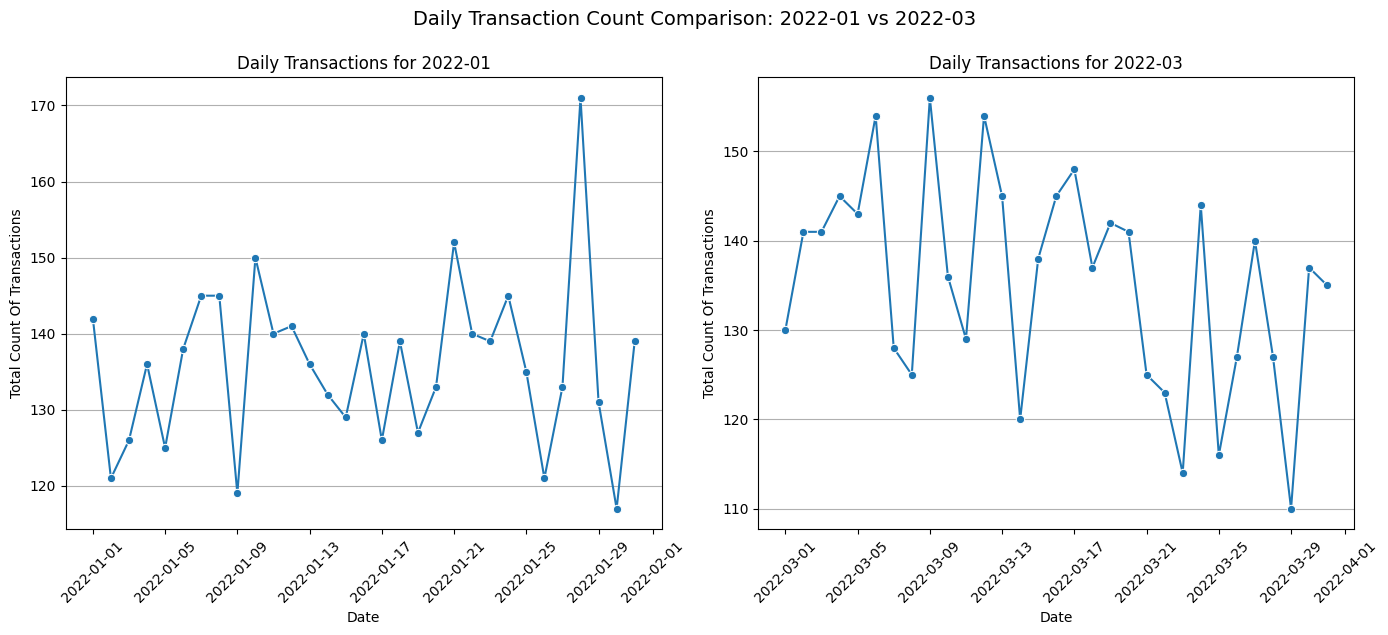

In [132]:
Daily_transacts_volume('2022-01','2022-03')

Monthly Transaction Trends — Volume and Value

In [133]:
# Sum of total monthly transactions

monthly_transacts=df1.groupby(df1['transaction_month'])['transaction_amount_usd'].sum().reset_index()

monthly_transacts.head(5)

,transaction_month,transaction_amount_usd
0,2022-01-01,2.772481e+06
1,2022-02-01,2.421997e+06
2,2022-03-01,2.948440e+06
3,2022-04-01,2.574831e+06
4,2022-05-01,2.753129e+06


In [134]:
# df1.groupby('transaction_month').agg(total_amt=('transaction_amount_usd','sum'),total_count=('transaction_amount_usd','count')).head().reset_index()

# better way to include both in the same code

In [135]:
# Total Count / Voulme of Transaction by Month

monthly_transacts_vol=df1.groupby(df1['transaction_month'])['transaction_amount_usd'].count().reset_index()

monthly_transacts_vol.head(5)

,transaction_month,transaction_amount_usd
0,2022-01-01,4213
1,2022-02-01,3782
2,2022-03-01,4196
3,2022-04-01,4086
4,2022-05-01,4313


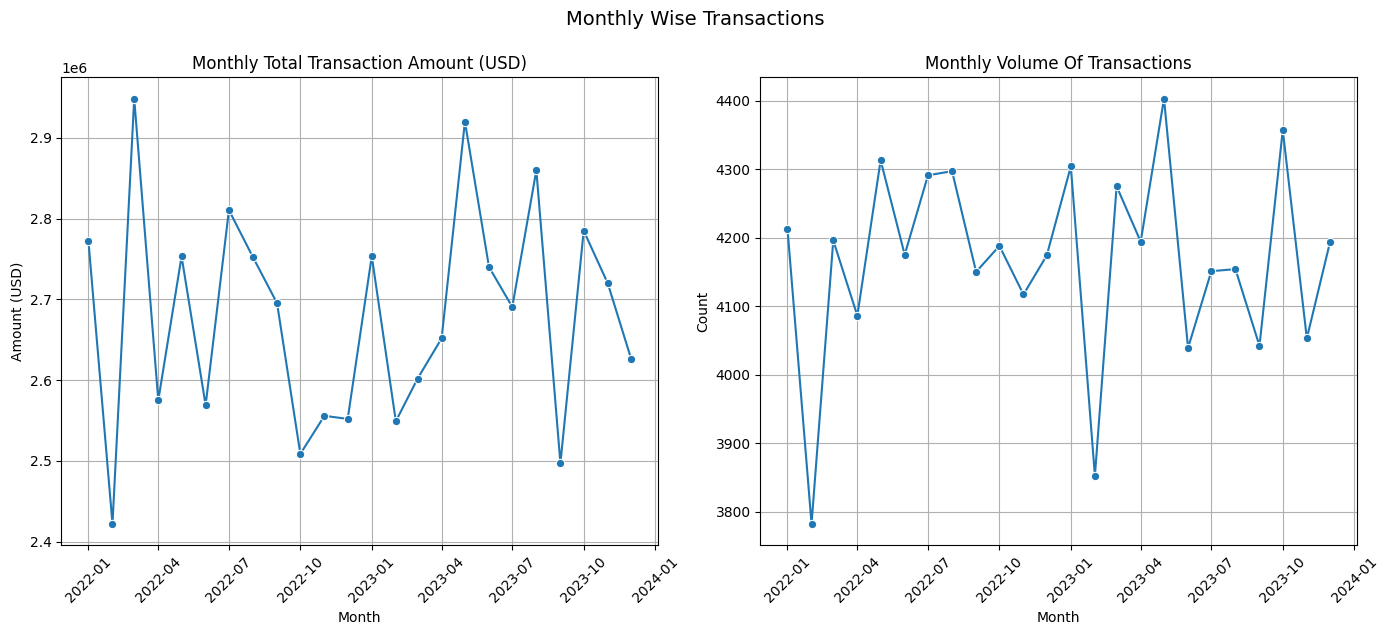

In [136]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.lineplot(data=monthly_transacts, x='transaction_month', y='transaction_amount_usd', marker='o')
plt.title("Monthly Total Transaction Amount (USD)")
plt.ylabel("Amount (USD)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)


plt.subplot(1,2,2)
sns.lineplot(data=monthly_transacts_vol, x='transaction_month', y='transaction_amount_usd', marker='o')
plt.title("Monthly Volume Of Transactions")
plt.ylabel("Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.suptitle('Monthly Wise Transactions', fontsize=14, y=1.05)
plt.show()

### Geographic & Merchant Concentration

 Analyzing customer spending distribution across top 5 countries.

In [137]:
country_total_transactions=(df1.groupby('location_country')['transaction_amount_usd'].sum().reset_index(name='total_transaction_amount_usd').
                            sort_values(by=['total_transaction_amount_usd'],ascending=False).round(2).head(5))

country_total_transactions

,location_country,total_transaction_amount_usd
208,South Sudan,382550.70
75,Fiji,344101.87
106,Iran,334196.77
236,United States of America,332121.62
43,Chad,331425.53


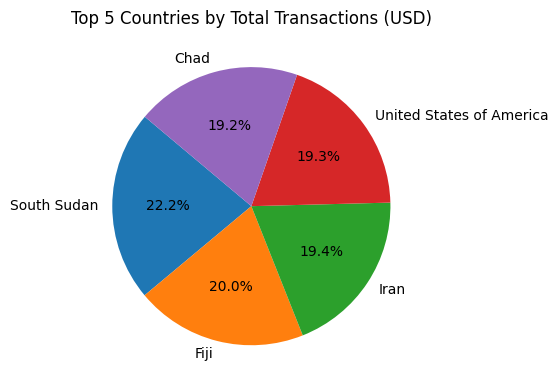

In [138]:

plt.figure(figsize=(6,4))
plt.pie(x=country_total_transactions['total_transaction_amount_usd'],labels=country_total_transactions['location_country'],autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries by Total Transactions (USD)')
plt.tight_layout()
plt.savefig("top5_countries.png", dpi=250, bbox_inches='tight', facecolor='white')
plt.show()

Top 5 Customers by Total Transaction Value

In [139]:
# Grouping by customer id and merchant name combo, summation of tranasctions amounts between them and choosing the top 5 transactions

top_5=df1.groupby(['customer_id','merchant_name'])['transaction_amount_usd'].sum().sort_values(ascending=False).head(5).reset_index(name='total_transaction_amt')

top_5

,customer_id,merchant_name,total_transaction_amt
0,d5bebaab-4faa-493e-9494-d9b5b8716297,Bins - Abernathy,16303.011909
1,9afce529-c6bb-40fc-a929-fea90f51d397,Jacobi Group,16263.066344
2,7244f473-ed22-4956-a1b1-053014daa43e,"McClure, Von and Grant",16254.874893
3,f500d73f-7f62-40d0-864b-480f586bacfe,Green LLC,16237.186579
4,5e70b6e1-f799-4d13-84e1-78163a88de90,Hodkiewicz Group,16212.579589


Top merchant categories and card issuers by spend

In [140]:
top_5=df1.groupby(['merchant_category','card_issuer'])['transaction_amount_usd'].sum().sort_values(ascending=False).head(5).reset_index(name='total_transaction_amt')

top_5

,merchant_category,card_issuer,total_transaction_amt
0,Beauty,discover,624214.798523
1,Music,visa,619265.761194
2,Tools,mastercard,600920.864405
3,Movies,visa,590514.489374
4,Baby,american_express,587894.597831


/tmp/ipython-input-3794107170.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='card_issuer', y='total_transaction_amt', palette='viridis')


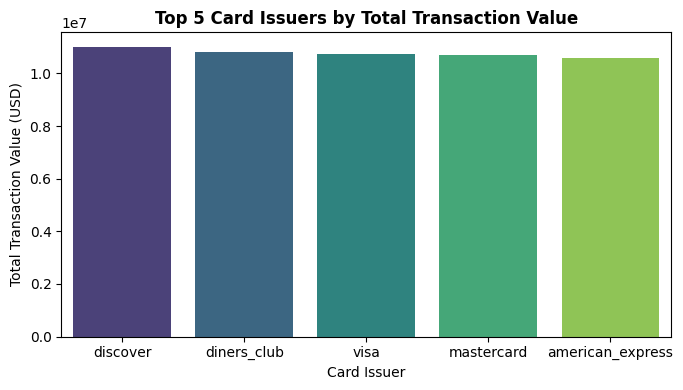

In [141]:
top_5=df1.groupby(['card_issuer'])['transaction_amount_usd'].sum().sort_values(ascending=False).head(5).reset_index(name='total_transaction_amt')

plt.figure(figsize=(7,4))
sns.barplot(data=top_5, x='card_issuer', y='total_transaction_amt', palette='viridis')
plt.title('Top 5 Card Issuers by Total Transaction Value', fontsize=12, weight='bold')
plt.xlabel('Card Issuer')
plt.ylabel('Total Transaction Value (USD)')
plt.tight_layout()
plt.show()


High-Value Young Customer Identification with a credit score above 700 and total spending > 5000.

In [142]:
youngest=df1[(df1['credit_score']>700) & (df1['transaction_amount_usd']>5000)][['customer_age','account_id']].sort_values(by=['customer_age']).head(1)

youngest_customer_id=youngest['account_id'].values

youngest_customer_id

array(['435347a9-b568-4b44-9df0-536c7a5f5718'], dtype=object)

## Analytical Insights
The Analytical Insights section builds upon the exploratory findings to uncover structured relationships and behavioral dependencies within the data.
Each subsequent analysis focuses on a specific dimension — demographics, merchant performance, financial dependencies, and fraud risk — to translate descriptive analytics into actionable intelligence.

### Demographic & Behavioral Patterns

This section explores how demographic and behavioral attributes — such as gender, age, and customer engagement — influence spending, balance trends, and reward accumulation.

####  1. How does the average transaction amount vary across merchant categories for different genders

In [143]:
df1['gender_mapped'].unique()

array(['non_binary', 'trans_male', 'trans_female', 'male', 'intersex',
       'female', 'other'], dtype=object)

In [144]:
# Grouping by gender and merchant name combo, summation of tranasctions amounts between them and choosing the top 5 transactions
df_avg = df1.groupby(['merchant_category','gender_mapped'])['transaction_amount_usd'].mean().reset_index().sort_values(by=['merchant_category','transaction_amount_usd'],ascending=[True,False])


#checking for automotive category

df_avg[df_avg['merchant_category']=='Automotive'].sort_values(by='transaction_amount_usd',ascending=False)

,merchant_category,gender_mapped,transaction_amount_usd
6,Automotive,trans_male,723.101583
4,Automotive,other,719.526014
5,Automotive,trans_female,694.582213
0,Automotive,female,648.179186
2,Automotive,male,625.853601
3,Automotive,non_binary,601.929008
1,Automotive,intersex,600.189909


In [145]:
df_avg[df_avg['merchant_category']=='Tools'].sort_values(by='transaction_amount_usd',ascending=False)

,merchant_category,gender_mapped,transaction_amount_usd
144,Tools,other,758.688849
146,Tools,trans_male,725.195219
143,Tools,non_binary,687.691427
145,Tools,trans_female,651.728998
140,Tools,female,628.131192
141,Tools,intersex,618.245975
142,Tools,male,553.728234


In [146]:
temp=df_avg[df_avg['merchant_category']=='Beauty'].sort_values(by='transaction_amount_usd',ascending=False)
temp

,merchant_category,gender_mapped,transaction_amount_usd
20,Beauty,trans_male,750.648167
14,Beauty,female,729.873074
18,Beauty,other,711.586060
16,Beauty,male,688.069259
17,Beauty,non_binary,660.422422
15,Beauty,intersex,606.427471
19,Beauty,trans_female,572.590924


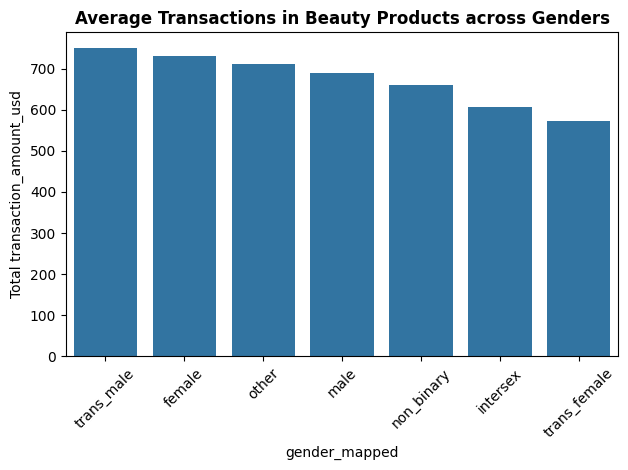

In [147]:
sns.barplot(data=temp,x='gender_mapped', y='transaction_amount_usd')
plt.title("Average Transactions in Beauty Products across Genders", fontsize=12, weight='bold')
plt.xlabel("gender_mapped") ,
plt.ylabel("Total transaction_amount_usd")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("merchant_gender_avg.png", dpi=250, bbox_inches='tight', facecolor='white')
plt.show()

In [148]:
df_avg[df_avg['gender_mapped']=='male'].sort_values(by='transaction_amount_usd',ascending=False)

,merchant_category,gender_mapped,transaction_amount_usd
93,Jewelry,male,801.930079
72,Health,male,743.947697
23,Books,male,729.902252
58,Garden,male,725.558164
44,Electronics,male,709.077374
30,Clothing,male,697.425271
135,Sports,male,691.827458
16,Beauty,male,688.069259
107,Movies,male,662.736260
65,Grocery,male,660.381883


#### 2. How are reward points distributed across different customer age groups?

In [149]:
#checking how the age group is ditributed to create buckets

df1['customer_age'].describe()

# min age is 18 , max is 90 , creating buckets of 10

,customer_age
count,100000.000000
mean,53.988040
std,21.097023
min,18.000000
25%,36.000000
50%,54.000000
75%,72.000000
max,90.000000


In [150]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]

labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']

# customer_age_bins=pd.cut(df1['customer_age'],bins=bins,labels=labels,right=True,include_lowest=True)


customer_age_bins_reward_points=df1.groupby(pd.cut(df1['customer_age'],bins=bins,labels=labels,right=True,include_lowest=True))['reward_points_earned'].mean().reset_index()

customer_age_bins_reward_points

# plt.figure(figsize=(10,6))
# sns.barplot(customer_age_bins_reward_points,x=customer_age_bins_reward_points['customer_age'],y=customer_age_bins_reward_points['reward_points_earned'])
# plt.title("Reward Points vs Customer Age Group")
# plt.ylabel("Total Reward Points Earned")
# plt.grid(axis='y')
# plt.xlabel("Customer Age Group")
# plt.tight_layout()
# plt.show()

/tmp/ipython-input-1426594254.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_age_bins_reward_points=df1.groupby(pd.cut(df1['customer_age'],bins=bins,labels=labels,right=True,include_lowest=True))['reward_points_earned'].mean().reset_index()


,customer_age,reward_points_earned
0,0–20,498.620295
1,21–30,500.508728
2,31–40,501.708321
3,41–50,500.155102
4,51–60,493.946258
5,61–70,497.923888
6,71–80,500.446856
7,81–90,505.109449


#### 3. How does the average balance after transactions vary across different age buckets?

In [151]:
# creating bins inside group by such that there is no additional columns created

age_grp_avg_balance_after=df1.groupby(pd.cut(df1['customer_age'],bins=bins,labels=labels,right=True,include_lowest=True))['balance_after_usd'].mean().reset_index()

age_grp_avg_balance_after

/tmp/ipython-input-1924093764.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grp_avg_balance_after=df1.groupby(pd.cut(df1['customer_age'],bins=bins,labels=labels,right=True,include_lowest=True))['balance_after_usd'].mean().reset_index()


,customer_age,balance_after_usd
0,0–20,1320.398336
1,21–30,1274.215437
2,31–40,1259.477948
3,41–50,1254.398511
4,51–60,1290.636114
5,61–70,1303.008226
6,71–80,1250.618550
7,81–90,1230.918701


#### 4. Top 10 Customers by Cumulative Reward Points


In [152]:
# since each customer is unique , filtering by id and sorting by reward points

df1[['account_id','reward_points_earned']].sort_values(by=['reward_points_earned'],ascending=False).head(10)

,account_id,reward_points_earned
18081,8c5f69c2-311b-461e-80e8-c9ba7ea73c12,1000
18412,35e0720c-1cda-4cb4-a0a9-adbbe7fe2b44,1000
28156,4750dd11-b2e1-47a0-a0c5-409fffaddcc6,1000
28097,943b600d-5ad0-48b9-b539-4f35b5613657,1000
83960,5d5b1815-4cdf-4fb1-a1b0-50873e933009,1000
27299,9e22d806-dde3-42b9-a4a2-3c5462004083,1000
90607,d938041f-99cd-4780-9ef1-e20d99270884,1000
2203,d52cd69d-90d0-4e5d-a3d9-cd03643e42d8,1000
90011,3b6f5393-3101-40dc-bbbc-80111a698d8b,1000
27095,657a4223-1815-41a8-9413-276aa6bd19ec,1000


#### Observations



South Sudan, Fiji, and Iran lead in overall transaction volumes, slightly surpassing major economies like the US.
This pattern suggests the dataset’s higher transaction intensity in emerging or niche markets rather than traditional large economies.

Across categories like Automotive and Beauty, transgender and female customers generally record higher average transaction values than male and non-binary segments.

Reward point accumulation remains relatively consistent across age groups, with minor peaks among mid-aged (31–40) and older (81–90) customers.
This uniformity suggests reward engagement is evenly distributed, not strongly age-dependent.

Post-transaction balances gradually increase with age, peaking in the 60–70 segment (~$1309), before tapering slightly among older customers.

### Merchant & Payment Channel Insights

To analyze transaction behaviors and operational risk indicators across merchant categories, payment methods, and issuers — identifying high-value, high-risk, or low-efficiency segments.

#### 1. Card Issuer Analysis — Transaction Distribution and Fraud Exposure

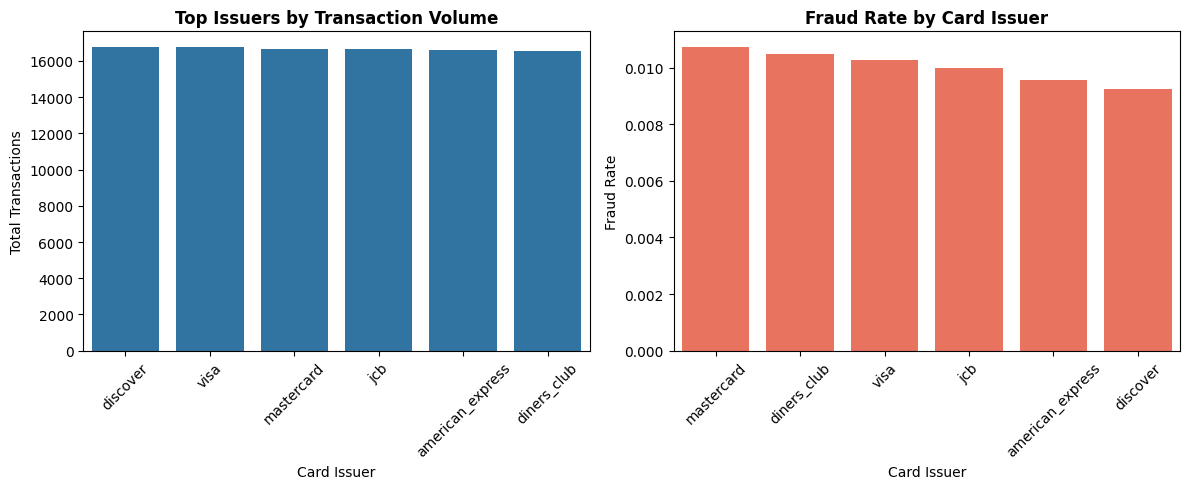

In [153]:
issuer_summary = (
    df1.groupby('card_issuer')
      .agg(total_txn=('transaction_id','count'),
           total_amount=('transaction_amount_usd','sum'),
           fraud_rate=('is_fraud','mean'))
      .reset_index()
      .sort_values('fraud_rate', ascending=False)
)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=issuer_summary.sort_values('total_txn', ascending=False).head(8),
            x='card_issuer', y='total_txn')
plt.title("Top Issuers by Transaction Volume", fontsize=12, weight='bold')
plt.xlabel("Card Issuer") ,
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=issuer_summary.head(8), x='card_issuer', y='fraud_rate', color='tomato')
plt.title("Fraud Rate by Card Issuer", fontsize=12, weight='bold')
plt.xlabel("Card Issuer")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)


plt.tight_layout()
plt.savefig("card_issuer_fraud.png", dpi=250, bbox_inches='tight', facecolor='white')
plt.show()


#### 2. Top Merchant Categories by Total Transaction Volume and Fraud Rate

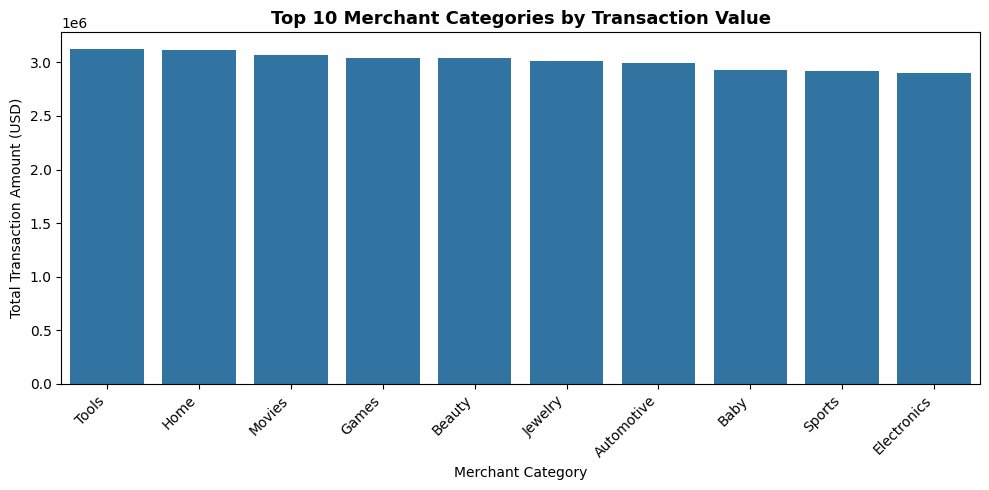

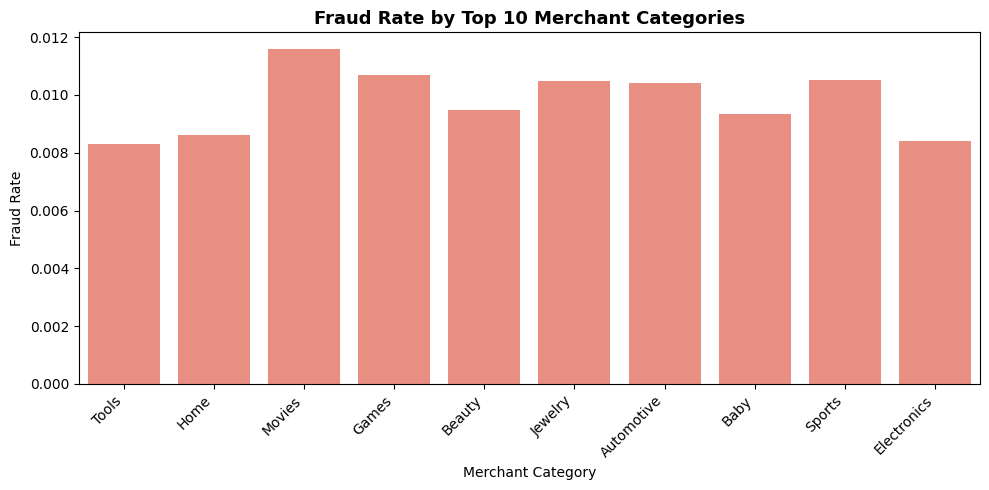

In [154]:
merchant_summary = (
    df1.groupby('merchant_category')
      .agg(total_txn=('transaction_id','count'),
           total_amount=('transaction_amount_usd','sum'),
           fraud_rate=('is_fraud','mean'))
      .reset_index()
      .sort_values('total_amount', ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(data=merchant_summary.head(10), x='merchant_category', y='total_amount')
plt.title("Top 10 Merchant Categories by Transaction Value", fontsize=13, weight='bold')
plt.xlabel("Merchant Category")
plt.ylabel("Total Transaction Amount (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Fraud rate view
plt.figure(figsize=(10,5))
sns.barplot(data=merchant_summary.head(10), x='merchant_category', y='fraud_rate', color='salmon')
plt.title("Fraud Rate by Top 10 Merchant Categories", fontsize=13, weight='bold')
plt.xlabel("Merchant Category")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### 3. Merchant-Level Concentration — Identifying High-Value and High-Risk Merchants

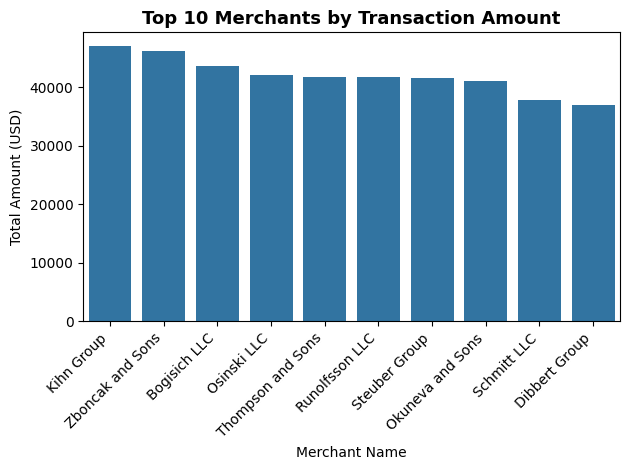

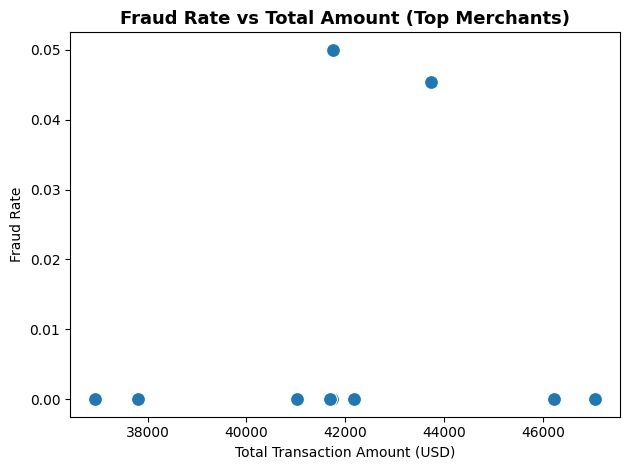

In [155]:
merchant_concentration = (
    df1.groupby('merchant_name')
      .agg(total_amount=('transaction_amount_usd','sum'),
           fraud_rate=('is_fraud','mean'))
      .reset_index()
)

top_merchants = merchant_concentration.sort_values('total_amount', ascending=False).head(10)
sns.barplot(data=top_merchants, x='merchant_name', y='total_amount')
plt.title("Top 10 Merchants by Transaction Amount", fontsize=13, weight='bold')
plt.xlabel("Merchant Name")
plt.ylabel("Total Amount (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Overlay fraud risk among them
sns.scatterplot(data=top_merchants, x='total_amount', y='fraud_rate', s=100)
plt.title("Fraud Rate vs Total Amount (Top Merchants)", fontsize=13, weight='bold')
plt.xlabel("Total Transaction Amount (USD)")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()


#### Observations

- Card issuer analysis shows minimal variation in fraud exposure, with all major networks maintaining comparable transaction volumes and loss ratios.

- Transaction activity is evenly distributed across major merchant categories, though digital and entertainment sectors such as Movies and Games exhibit disproportionately higher fraud rates.

- Among top-performing merchants, fraud exposure varies significantly even within similar transaction volumes, highlighting that risk concentration is merchant-specific rather than category-driven.

These findings emphasize the need for merchant-level risk segmentation and issuer-specific fraud scoring, ensuring operational focus on merchants that combine high value with elevated exposure.


### Fraud & Risk Behavior Analysis

This section explores transactional risk patterns across regional, temporal, and behavioral dimensions to identify potential fraud hotspots and exposure trends. Examines how fraud frequency and monetary impact vary by geography, merchant activity,uncovering where and when financial risk is most concentrated.

#### 1. Which states exhibit the highest concentration of fraudulent transactions?

In [156]:
# creating a subset of date having fraud transactions and grouped by the state
fraud_states=df1[df1['is_fraud']==True].groupby('location_state').size().reset_index(name='fraud_count')

# total transactions for each state - to help in figure out rate
total_by_state=df1['location_state'].value_counts().reset_index(name='total_transactions')

# merging both DF's
fraud_states=fraud_states.merge(total_by_state,on='location_state')

# creating Fraud ratio
fraud_states['fraud_ratio']=(fraud_states['fraud_count']/fraud_states['total_transactions']) *100

# Sorting by highest fraudulent ratio
fraud_states=fraud_states.sort_values(by=['fraud_ratio'],ascending=False).head(5)

/tmp/ipython-input-4161202232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_states, x='location_state', y='fraud_ratio', palette='viridis')


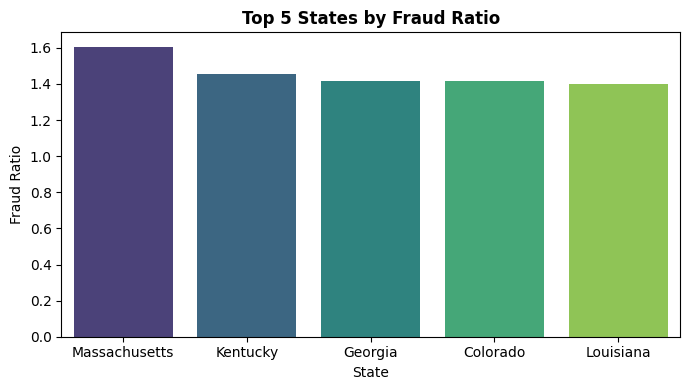

In [157]:
plt.figure(figsize=(7,4))
sns.barplot(data=fraud_states, x='location_state', y='fraud_ratio', palette='viridis')
plt.title('Top 5 States by Fraud Ratio', fontsize=12, weight='bold')
plt.xlabel('State')
plt.ylabel('Fraud Ratio')
plt.tight_layout()
plt.savefig("fraud_by_state.png", dpi=250, bbox_inches='tight', facecolor='white')
plt.show()

#### 2. How do total fraud amount and volume fluctuate over time?

In [158]:
fraud_df=df[df['is_fraud']==1]

fraud_amt_monthly=fraud_df.groupby('transaction_month')['transaction_amount_usd'].sum().reset_index(name='total_amt')

fraud_count_monthly=fraud_df.groupby('transaction_month')['transaction_amount_usd'].count().reset_index(name='total_count')

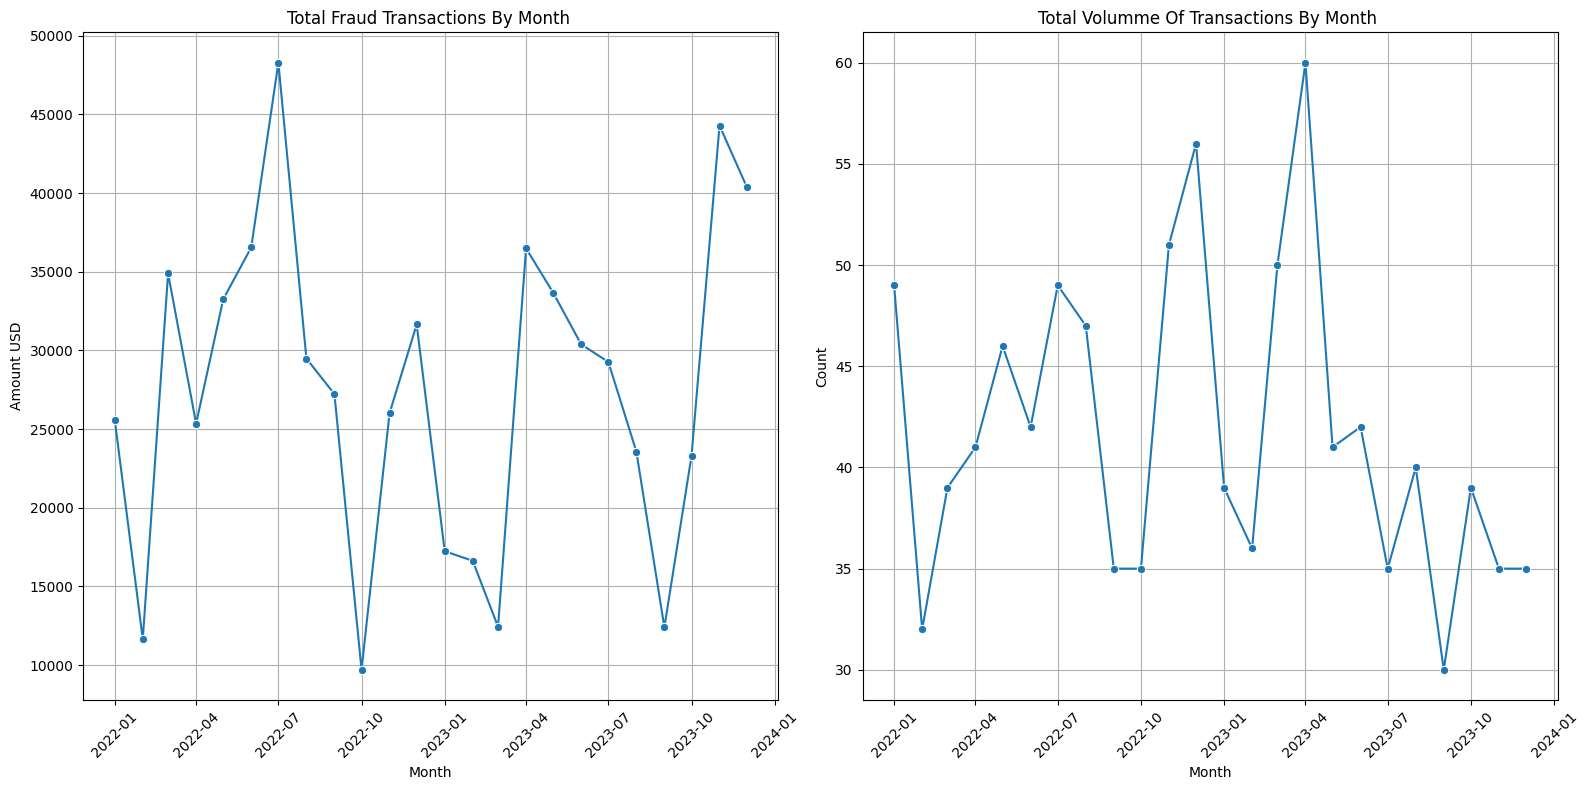

In [159]:
plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
sns.lineplot(fraud_amt_monthly,x=fraud_amt_monthly['transaction_month'],y=fraud_amt_monthly['total_amt'],marker="o")
plt.title("Total Fraud Transactions By Month ")
plt.ylabel("Amount USD")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1,2,2)
sns.lineplot(fraud_count_monthly,x=fraud_count_monthly['transaction_month'],y=fraud_count_monthly['total_count'],marker="o")
plt.title("Total Volumme Of Transactions By Month ")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Month")
plt.grid(True)

plt.tight_layout()
plt.show()


#### 3. Which merchants report the highest number of fraudulent transactions?

In [160]:
fraud_df=df1[df1['is_fraud']==1]

fraud_trans_merch=fraud_df['merchant_name'].value_counts(ascending=False).reset_index()


top_fraud_merch=fraud_trans_merch[fraud_trans_merch['count']==fraud_trans_merch['count'].max()]

top_fraud_merch

,merchant_name,count
0,West Group,2
1,Pollich LLC,2
2,Kuhic and Sons,2
3,Durgan and Sons,2
4,Deckow LLC,2
5,Koss LLC,2
6,Olson LLC,2
7,Stracke and Sons,2
8,Daniel Group,2
9,Wilkinson Inc,2


#### 4. Which countries exhibit the highest fraud exposure by transaction value and count?

In [161]:
# Group all transactions by country and calculate the total transaction amount
all = df1.groupby('location_country')['transaction_amount_usd'].sum().reset_index(name='total_transaction_amt').round(2)

# Group fraudulent transactions by country and calculate the total fraud transaction amount
fraud = fraud_df.groupby('location_country')['transaction_amount_usd'].sum().reset_index(name='total_fraud_transaction_amt').round(2)

# Merge the datas
temp = all.merge(fraud, on='location_country')

# Calculate the fraud rate based on transaction amount
temp['fraud_rate_amt'] = temp['total_fraud_transaction_amt'] / temp['total_transaction_amt'] * 100

# Sort countries by highest fraud rate and display the top 5
temp.sort_values(by='fraud_rate_amt', ascending=False).head()


,location_country,total_transaction_amt,total_fraud_transaction_amt,fraud_rate_amt
227,Turks and Caicos Islands,305725.87,23845.23,7.799546
84,Ghana,270975.52,19622.51,7.241433
96,Haiti,230898.24,16519.66,7.154520
246,Zimbabwe,230945.66,12318.97,5.334142
210,Suriname,216367.82,11227.86,5.189247


In [162]:
# Group all transactions by country and count the number of transactions
transaction_counts = df1.groupby('location_country')['transaction_amount_usd']\
                        .count().reset_index(name='total_transaction_count').round(2)

# Group fraudulent transactions by country and count the number of fraud transactions
fraud_counts = fraud_df.groupby('location_country')['transaction_amount_usd']\
                       .count().reset_index(name='total_fraud_transaction_count').round(2)

# Merge the two datasets on location_country to compare counts
country_fraud_summary = transaction_counts.merge(fraud_counts, on='location_country')

# Calculate fraud rate as a percentage of transactions that were fraudulent
country_fraud_summary['fraud_rate'] = (
    country_fraud_summary['total_fraud_transaction_count'] /
    country_fraud_summary['total_transaction_count']
) * 100

# Sort countries by highest fraud rate and display the top 5
country_fraud_summary.sort_values(by='fraud_rate', ascending=False).head()


,location_country,total_transaction_count,total_fraud_transaction_count,fraud_rate
106,Iraq,413,10,2.421308
144,Monaco,382,9,2.356021
164,Norway,398,9,2.261307
20,Belarus,381,8,2.099738
56,Curacao,383,8,2.088773


#### 5. Does the length of customer relationship affect fraud probability?

In [163]:
fraud_df['tenure_years'].describe()

# creating tenure time bucets from 0 to 11 years

,tenure_years
count,1004.000000
mean,5.369862
std,2.952096
min,0.260000
25%,2.664500
50%,5.579500
75%,7.987500
max,10.230000


In [164]:
tenure_bins= [0,1,2,3,4,5,6,7,8,9,10,11]
tenure_labels = ['<1y', '1–2y', '2–3y', '3–4y','4-5y' ,'5–6y', '6-7y' , '7-8y','8-9y' , '9-10y' , '10-11y']

fraud_df=df1[df1['is_fraud']==1]

# Total transactions by bins
total_counts=df1.groupby(pd.cut(df1['tenure_years'],bins=tenure_bins,labels=tenure_labels,include_lowest=True,right=True))['is_fraud'].count().reset_index(name='total_count')

# Fraud Transactions By bins
fraud_tenure_df=fraud_df.groupby(pd.cut(fraud_df['tenure_years'],bins=tenure_bins,labels=tenure_labels,include_lowest=True,right=True))['is_fraud'].count().reset_index(name='fraud_count')

# Merging both Dataframes
tenure_fraud_analysis=total_counts.merge(fraud_tenure_df,on='tenure_years')

tenure_fraud_analysis['fraud_rate_probabiltiy']=round((tenure_fraud_analysis['fraud_count'] / tenure_fraud_analysis['total_count'] *100),2)

tenure_fraud_analysis

/tmp/ipython-input-4105667108.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts=df1.groupby(pd.cut(df1['tenure_years'],bins=tenure_bins,labels=tenure_labels,include_lowest=True,right=True))['is_fraud'].count().reset_index(name='total_count')
/tmp/ipython-input-4105667108.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_tenure_df=fraud_df.groupby(pd.cut(fraud_df['tenure_years'],bins=tenure_bins,labels=tenure_labels,include_lowest=True,right=True))['is_fraud'].count().reset_index(name='fraud_count')


,tenure_years,total_count,fraud_count,fraud_rate_probabiltiy
0,<1y,7791,80,1.03
1,1–2y,9868,108,1.09
2,2–3y,10009,98,0.98
3,3–4y,9881,72,0.73
4,4-5y,10092,88,0.87
5,5–6y,9961,98,0.98
6,6-7y,10258,114,1.11
7,7-8y,9926,96,0.97
8,8-9y,10037,111,1.11
9,9-10y,10014,111,1.11


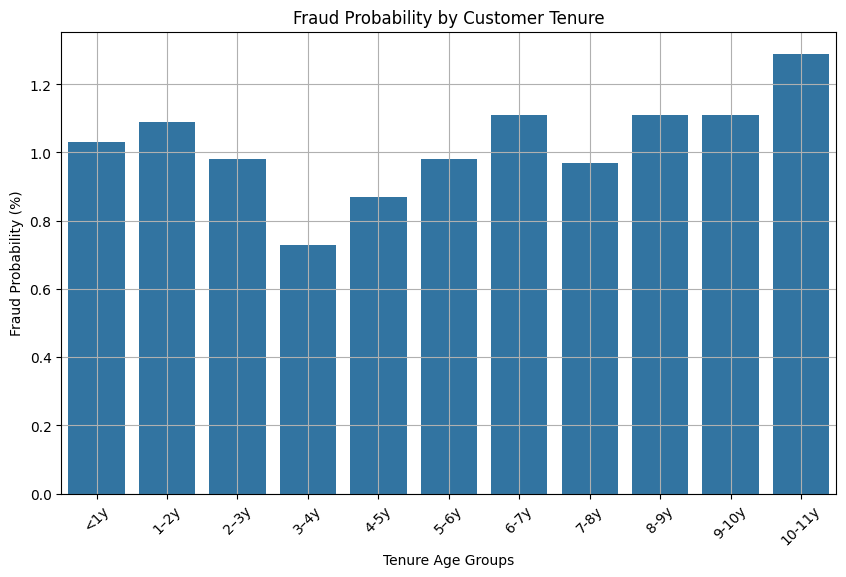

In [165]:
plt.figure(figsize=(10,6))
sns.barplot(tenure_fraud_analysis,x='tenure_years',y='fraud_rate_probabiltiy')
plt.title("Fraud Probability by Customer Tenure")
plt.xlabel('Tenure Age Groups')
plt.ylabel('Fraud Probability (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Observations

- Massachusetts, Kentucky, and Georgia record the highest fraud ratios (1.6%, 1.45%, and 1.42% respectively).
This suggests mild regional clustering, but overall low variance in state-level fraud exposure — likely influenced by population and transaction volume.

- Fraudulent transaction values show sharp volatility month-to-month, with visible spikes around early 2022 and late 2023.

- Multiple merchants, primarily medium-volume sellers (e.g., West Group, Pollich LLC, Kuhic & Sons), show repeated small-scale fraud instances rather than single dominant fraud sources.

- By amount, Turks & Caicos Islands (7.77%), Ghana (7.22%), and Haiti (7.12%) show the most significant proportional fraud losses.
By count, Iraq, Monaco, and Norway top the list (fraud rates ~2.3%).
The divergence between amount-based and count-based rankings highlights two distinct fraud patterns — high-value losses in smaller economies versus frequent low-value frauds in stable financial regions.

- Fraud likelihood remains consistent across tenure groups (≈1%), with no strong trend indicating risk reduction over time.

### Financial Correlations & Dependencies

This section examines the interrelationships between key financial indicators such as transaction amount, account balance, credit score, and customer tenure.

#### 1. Relationship Between Credit Score and Average Account Balance



In [166]:
# Customers with higher credit scores usually maintain higher balances — verifying this

/tmp/ipython-input-1910049560.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(pd.cut(df1['credit_score'], bins=[300, 500, 650, 750, 850]))


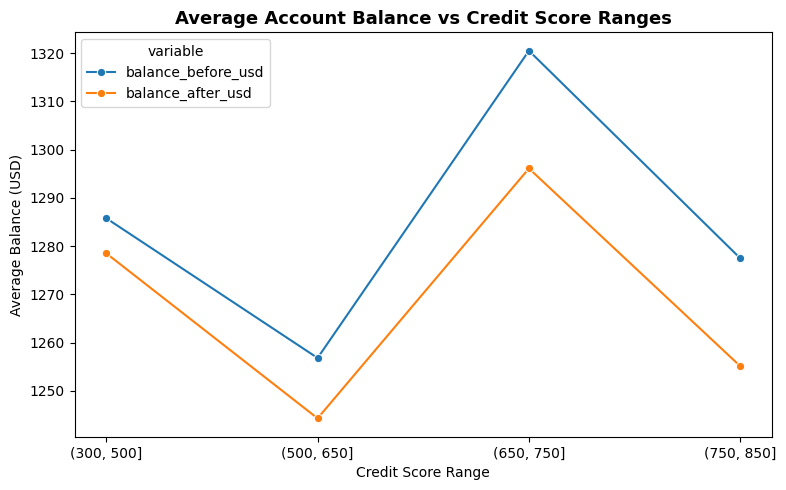

In [167]:
avg_balance_by_credit = (
    df1.groupby(pd.cut(df1['credit_score'], bins=[300, 500, 650, 750, 850]))
    [['balance_before_usd', 'balance_after_usd']].mean().reset_index()
)


# Convert interval column to string for plotting
avg_balance_by_credit['credit_score'] = avg_balance_by_credit['credit_score'].astype(str)
plt.figure(figsize=(8,5))


sns.lineplot(
    data=avg_balance_by_credit.melt(id_vars='credit_score'),
    x='credit_score', y='value', hue='variable', marker='o'
)
plt.title("Average Account Balance vs Credit Score Ranges", fontsize=13, weight='bold')
plt.xlabel("Credit Score Range")
plt.ylabel("Average Balance (USD)")
plt.tight_layout()
plt.show()


#### 2. Average Balance by Customer Tenure Group

/tmp/ipython-input-269717456.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_balance = df1.groupby(pd.cut(df1['tenure_years'], bins=[0,2,4,6,8,10,12]))['balance_after_usd'].mean().reset_index()


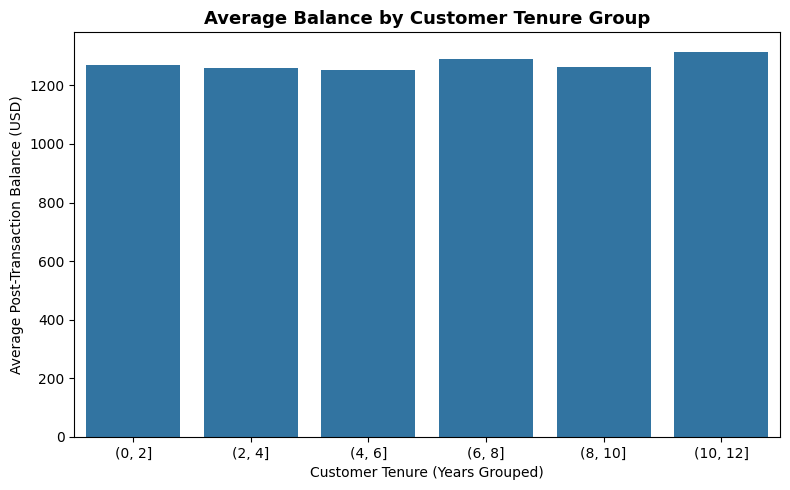

In [168]:
tenure_balance = df1.groupby(pd.cut(df1['tenure_years'], bins=[0,2,4,6,8,10,12]))['balance_after_usd'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=tenure_balance, x='tenure_years', y='balance_after_usd')
plt.title("Average Balance by Customer Tenure Group", fontsize=13, weight='bold')
plt.xlabel("Customer Tenure (Years Grouped)")
plt.ylabel("Average Post-Transaction Balance (USD)")
plt.tight_layout()
plt.show()


#### 3. Credit Score Segments — Rewards vs Average Transaction Amount

/tmp/ipython-input-1392313332.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby(pd.cut(df1['credit_score'], bins=[300,500,650,750,850]))[['transaction_amount_usd','reward_points_earned']].mean().reset_index()


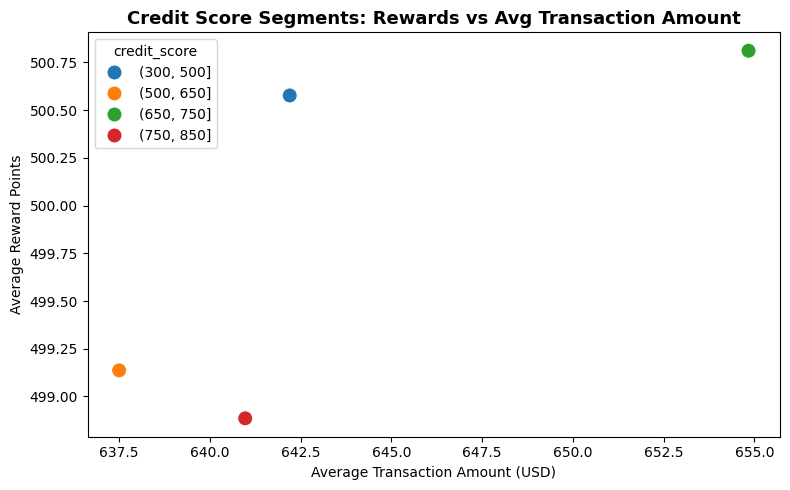

In [169]:
agg = df.groupby(pd.cut(df1['credit_score'], bins=[300,500,650,750,850]))[['transaction_amount_usd','reward_points_earned']].mean().reset_index()
plt.figure(figsize=(8,5))
sns.scatterplot(data=agg, x='transaction_amount_usd', y='reward_points_earned', hue='credit_score', s=120)
plt.title("Credit Score Segments: Rewards vs Avg Transaction Amount", fontsize=13, weight='bold')
plt.xlabel("Average Transaction Amount (USD)")
plt.ylabel("Average Reward Points")
plt.tight_layout()
plt.show()


Higher credit score customers transact marginally more, but rewards remain uniform, implying limited differentiation in loyalty incentives across credit tiers.

#### 4. Heatmap of correlation among numerical features (amount, balance, score, etc).

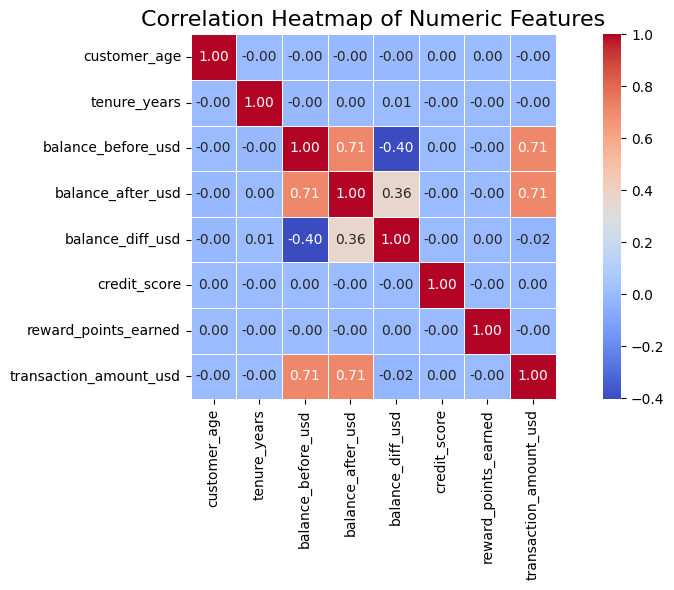

In [170]:
corr_data=df1.select_dtypes(include=['int64', 'float64']).corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr_data,annot=True,cmap='coolwarm',linewidths=0.5,fmt=".2f",square=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

#### Observations

- Customers with higher credit scores generally maintain healthier pre- and post-transaction balances, suggesting better liquidity management.

- Longer-tenured customers display slightly higher average balances, reflecting gradual trust and credit growth over time.

- Transaction and reward point trends show limited dependency, implying that reward accrual is activity-based rather than value-driven.


- Correlation analysis reveals that while transaction amounts and balances exhibit mild positive relationships, most financial variables are only weakly associated — indicating that no single metric dominantly explains customer financial behavior.

## **Consolidated Insights**

This section summarizes some of the key analytical findings from the exploratory and targeted analyses conducted throughout the project.

***Transaction & Customer Behavior***

- Transaction volume remained steady across months, with no major anomalies — reflecting consistent customer activity.

- Spending is geographically concentrated; top regions like the U.S., Fiji, and Iran contribute a large share of total volume, highlighting market dependency.

- Reward points distribution was relatively uniform across age groups, implying consistent engagement across demographics.
---
***Merchant & Payment Channel Insights***

- Transaction value was dominated by Visa, MasterCard, and Diners Club, each contributing roughly similar total amounts (~$10–11M).

- Fraud rates across issuers were very close (0.9–1.07%), indicating uniform fraud exposure across card networks.

- A handful of merchant categories contributed most to overall spend, suggesting operational and fraud-monitoring focus should be concentrated on these high-volume channels.
---
***Fraud & Risk Behavior***

- Massachusetts, Kentucky, and Georgia reported the highest fraud ratios (1.4–1.6%), though overall fraud remained low.

- Fraudulent activity showed minor monthly variation and followed the general transaction pattern, suggesting stable detection and low volatility.

- Fraud rates by country were elevated in Turks & Caicos (7.77%), Ghana (7.22%), and Haiti (7.11%), but transaction volumes were small — pointing to localized anomalies rather than systemic risk.

- Fraud probability by tenure showed no clear trend (0.8–1.1%), implying fraud likelihood is not linked to customer longevity.
